# Multi-Class Prediction of Obesity Risk

2024.02.25

---

## 1. 프로젝트 개요

### 1-1. 프로젝트 요약
- 제목: Multi-Class Prediction of Obesity Risk
- 설명: 심혈관 질환과 관련된 개인의 비만 위험 예측
- 사용한 데이터셋
    - [Multi-Class Prediction of Obesity Risk](https://www.kaggle.com/competitions/playground-series-s4e2)
- 진행 절차 및 내용
    - 내용1
    - 내용2
- 사용한 스킬셋
    - pandas
    - matplotlib, seaborn
    - ...

### 1-2. 프로젝트 진행 배경

내용

---

## 2. 데이터 로딩 및 EDA

### 2-1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import pickle

In [4]:
obesity_df = pd.read_csv('train.csv', index_col=0)
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II


In [5]:
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [6]:
obesity_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

결측치 없고 깔끔하고 야무진 데이터다.

### 2-2. 데이터 분포 확인 및 전처리

#### 2-2-1. 컬럼별 EDA (목적 변수)

In [89]:
obesity_df['NObeyesdad'].value_counts().to_frame()

,NObeyesdad
Obesity_Type_III,4046
Obesity_Type_II,3248
Normal_Weight,3082
Obesity_Type_I,2910
Insufficient_Weight,2523
Overweight_Level_II,2522
Overweight_Level_I,2427


- Insufficient_Weight: 저체중
- Normal_Weight: 정상
- Overweight_Level_I: 과체중(1)
- Overweight_Level_II: 과체중(2)
- Obesity_Type_I: 비만(1)
- Obesity_Type_II: 비만(2)
- Obesity_Type_III: 비만(3)

In [107]:
obesity_df['NObeyesdad_Numeric'] = obesity_df['NObeyesdad'].map({
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
})

obesity_df[['NObeyesdad', 'NObeyesdad_Numeric']].value_counts().to_frame().sort_values(by='NObeyesdad_Numeric')

,,0
NObeyesdad,NObeyesdad_Numeric,
Insufficient_Weight,0,2523
Normal_Weight,1,3082
Overweight_Level_I,2,2427
Overweight_Level_II,3,2522
Obesity_Type_I,4,2910
Obesity_Type_II,5,3248
Obesity_Type_III,6,4046


In [83]:
obesity_df['NObeyesdad_Summary'] = obesity_df['NObeyesdad'].map({
    'Insufficient_Weight': 'Insufficient_Weight',
    'Normal_Weight': 'Normal_Weight',
    'Overweight_Level_I': 'Overweight',
    'Overweight_Level_II': 'Overweight',
    'Obesity_Type_I': 'Obesity',
    'Obesity_Type_II': 'Obesity',
    'Obesity_Type_III': 'Obesity'
})

obesity_df['NObeyesdad_Summary'].value_counts()

Obesity                10204
Overweight              4949
Normal_Weight           3082
Insufficient_Weight     2523
Name: NObeyesdad_Summary, dtype: int64

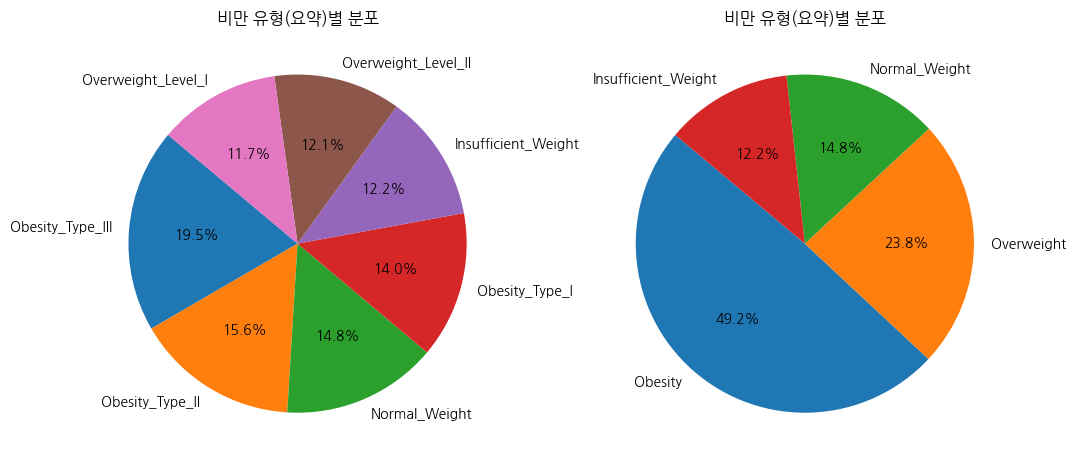

In [91]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

axes[0].pie(
    obesity_df['NObeyesdad'].value_counts(),
    labels=obesity_df['NObeyesdad'].value_counts().index,
    autopct='%.1f%%',
    startangle=140
)
axes[0].set_title('비만 유형(요약)별 분포')

axes[1].pie(
    obesity_df['NObeyesdad_Summary'].value_counts(),
    labels=obesity_df['NObeyesdad_Summary'].value_counts().index,
    autopct='%.1f%%',
    startangle=140
)
axes[1].set_title('비만 유형(요약)별 분포')

plt.show()

비만의 비율이 과반에 육박하고, **비만+과체중**이 거의 3/4에 달한다.

#### 2-2-2. 컬럼별 EDA (인구통계학적 컬럼)

- Gender: 성별
- Age: 연령

In [22]:
obesity_df['Gender'].value_counts().to_frame()

,Gender
Female,10422
Male,10336


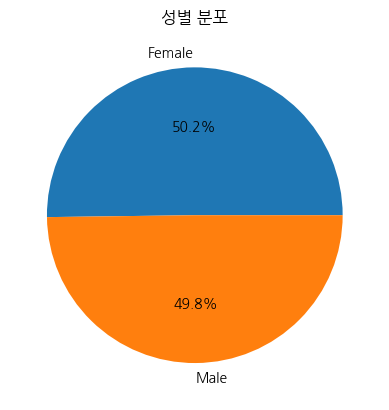

In [19]:
plt.pie(
    obesity_df['Gender'].value_counts(),
    labels=obesity_df['Gender'].value_counts().index,
    autopct='%.1f%%'
)

plt.title('성별 분포')
plt.show()

거의 균등한 분포를 가진다. 이런 경우 Label Encoding으로 우선 순위(가중치)를 주는 게 문제가 생길 수 있으므로 One-Hot Encoding을 진행하는 편이 좋겠다.

In [21]:
obesity_df['Gender_Female'] = obesity_df['Gender'].map({'Male': 0, 'Female': 1})
obesity_df['Gender_Male'] = obesity_df['Gender'].map({'Female': 0, 'Male': 1})

obesity_df[['Gender', 'Gender_Female', 'Gender_Male']].value_counts().to_frame()

,,,0
Gender,Gender_Female,Gender_Male,
Female,1,0,10422
Male,0,1,10336


In [14]:
obesity_df['Age'].describe()

count    20758.000000
mean        23.841804
std          5.688072
min         14.000000
25%         20.000000
50%         22.815416
75%         26.000000
max         61.000000
Name: Age, dtype: float64

In [26]:
str(int(100.1 // 10))

'10'

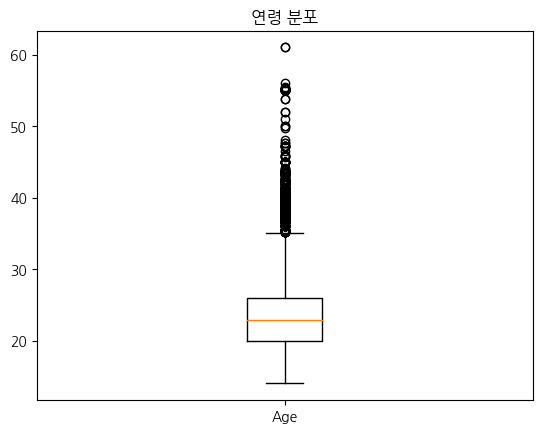

In [18]:
plt.boxplot(
    obesity_df['Age'],
    labels=['Age']
)
plt.title('연령 분포')

plt.show()

20대의 표본이 압도적으로 많은 듯하다.

In [31]:
obesity_df['Age_Band'] = obesity_df['Age'].apply(
    lambda x: str(int(x // 10)) if x < 10 else str(int(x // 10)) + '0'
)

obesity_df['Age_Band'].value_counts().sort_index()

10     5140
20    12722
30     2509
40      317
50       68
60        2
Name: Age_Band, dtype: int64

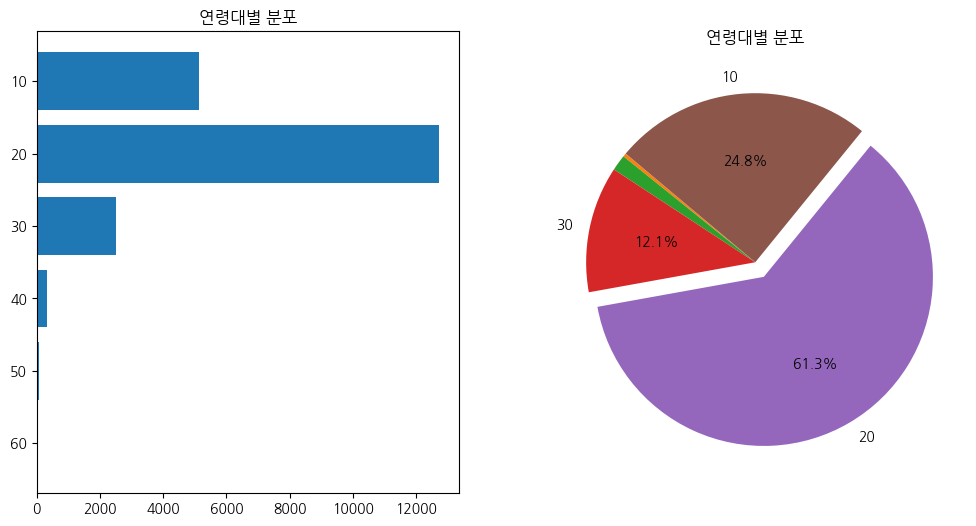

In [63]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

axes[0].barh(
    obesity_df['Age_Band'].value_counts().sort_index(ascending=False).index,
    obesity_df['Age_Band'].value_counts().sort_index(ascending=False)
)
axes[0].set_title('연령대별 분포')

max_index = obesity_df['Age_Band'].value_counts().sort_values(ascending=False).index[0]
def autopct_condition(pct):
    return 
axes[1].pie(
    obesity_df['Age_Band'].value_counts().sort_index(ascending=False),
    labels=[
        obesity_df['Age_Band'].value_counts().sort_index(ascending=False).index[i]\
        if obesity_df['Age_Band'].value_counts(normalize=True).sort_index(ascending=False)[i] > 0.05 else ''
        for i in range(len(obesity_df['Age_Band'].value_counts()))
    ],
    autopct=lambda x:'{:.1f}%'.format(x) if x > 5 else '',
    startangle=140,
    explode=[
        0.1 if obesity_df['Age_Band'].value_counts().sort_index(ascending=False).index[i] == max_index\
        else 0 for i in range(len(obesity_df['Age_Band'].value_counts()))
    ]
)
axes[1].set_title('연령대별 분포')


plt.show()

**10대, 20대, 30대**의 데이터가 절대 다수이고, 특히 20대의 데이터가 61.3%로 가장 많다. 40대, 50대, 60대의 데이터는 다 합쳐도 약 1.9%에 불과하다.

#### 2-2-3. 컬럼별 EDA (키, 몸무게)

In [72]:
obesity_df[['Height', 'Weight']].describe()

,Height,Weight
count,20758.000000,20758.000000
mean,1.700245,87.887768
std,0.087312,26.379443
min,1.450000,39.000000
25%,1.631856,66.000000
50%,1.700000,84.064875
75%,1.762887,111.600553
max,1.975663,165.057269


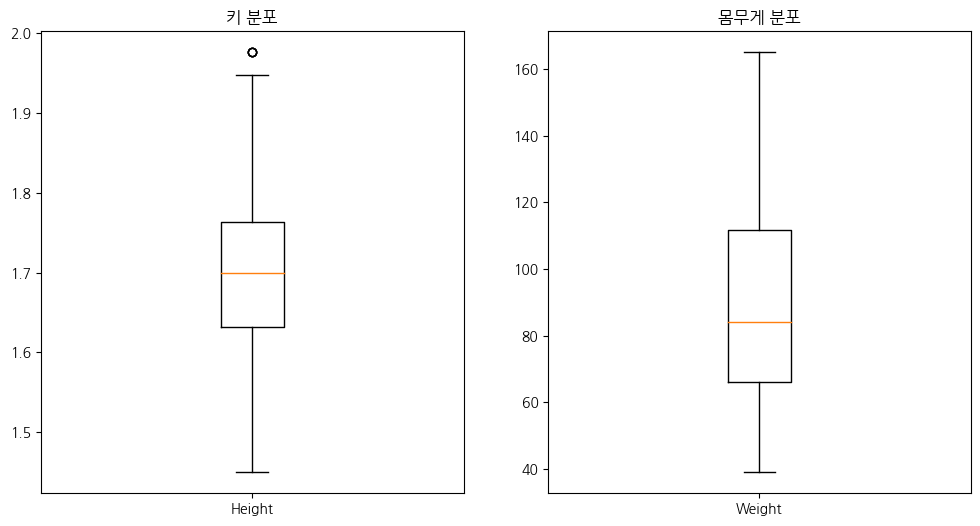

In [73]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

axes[0].boxplot(
    obesity_df['Height'],
    labels=['Height']
)
axes[0].set_title('키 분포')

axes[1].boxplot(
    obesity_df['Weight'],
    labels=['Weight']
)
axes[1].set_title('몸무게 분포')

plt.show()

결측치가 거의 없이 예쁜 분포다. 키는 m 단위인 것 같고 몸무게는 kg 단위인 것 같다.

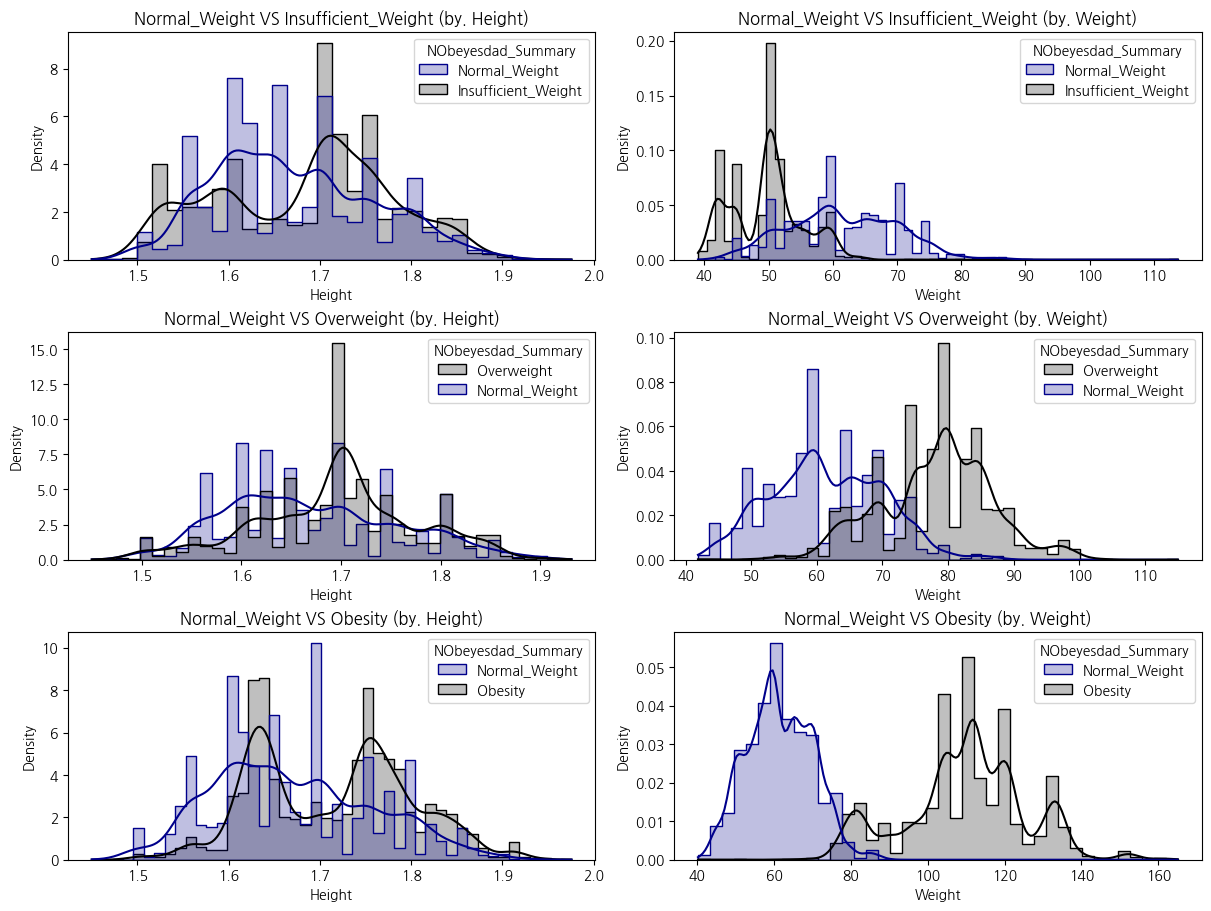

In [126]:
obesity_type = ['Insufficient_Weight', 'Overweight', 'Obesity']
col_names = ['Height', 'Weight']

fig, axes = plt.subplots(nrows=len(obesity_type), ncols=len(col_names), figsize=(12, 9), constrained_layout=True)

for i in range(len(obesity_type)):
    for j in range(len(col_names)):
        sns.histplot(
            data=obesity_df[
                (obesity_df['NObeyesdad_Summary'] == obesity_type[i]) | (obesity_df['NObeyesdad_Summary'] == 'Normal_Weight')
            ],
            x=col_names[j],
            hue='NObeyesdad_Summary',
            element='step',
            stat='density',
            common_norm=False,
            kde=True,
            palette={'Normal_Weight': 'darkblue', obesity_type[i]: 'black'},
            ax=axes[i][j]
        )
        axes[i][j].set_title(f"Normal_Weight VS {obesity_type[i]} (by. {col_names[j]})")

plt.show()

키, 몸무게 기준으로 ```sns.histplot```을 찍어본 결과
- 키는 저체중, 정상, 과체중, 비만과 연관 지을 가시적인 패턴이 나타나진 않는 것 같다.
- 몸무게는 저체중 < 정상 < 과체중 < 비만의 순서가 명확하게 나타난다.

#### 2-2-4. 컬럼별 EDA (가족력)

In [129]:
obesity_df['family_history_with_overweight'].value_counts().to_frame()

,family_history_with_overweight
yes,17014
no,3744


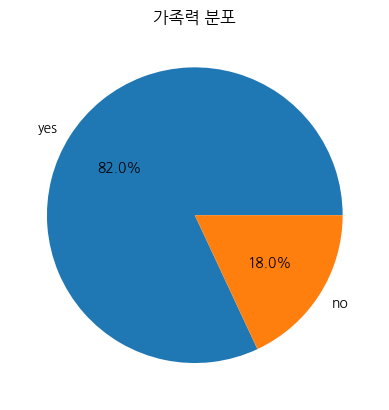

In [133]:
plt.pie(
    obesity_df['family_history_with_overweight'].value_counts(),
    labels=obesity_df['family_history_with_overweight'].value_counts().index,
    autopct='%.1f%%'
)

plt.title('가족력 분포')
plt.show()

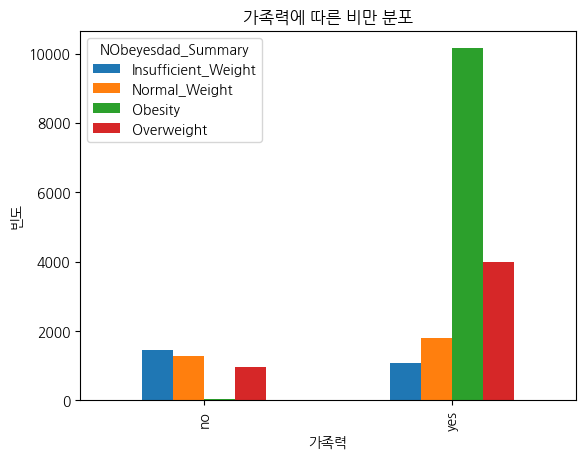

In [162]:
obesity_df.groupby('family_history_with_overweight')[
    'NObeyesdad_Summary'
].value_counts().unstack(fill_value=0).plot(kind='bar')

plt.title('가족력에 따른 비만 분포')
plt.xlabel('가족력')
plt.ylabel('빈도')

plt.show()

가족력도 비만에 큰 영향을 주는 점을 확인할 수 있다.

In [177]:
obesity_df['Family_History_Numeric'] = obesity_df['family_history_with_overweight'].map({
    'no': 0, 'yes': 1
})

#### 2-2-5. 컬럼별 EDA (식습관 관련)

- FAVC: 고열량 음식의 빈번한 소비
- FCVC: 야채 섭취 빈도
- NCP: 주요 식사 횟수
- CAEC: 식사 사이에 음식을 섭취하는 빈도
- CH2O: 매일 물을 마시는 양
- CALC: 주류 소비

In [174]:
categorical_columns = {
    'FAVC': '고열량 음식의 빈번한 소비',
    'CAEC': '식사 사이에 음식을 섭취하는 빈도',
    'CALC': '주류 소비'
}

numeric_columns = {
    'FCVC': '야채 섭취 빈도',
    'NCP': '주요 식사 횟수',
    'CH2O': '매일 물을 마시는 양'
}

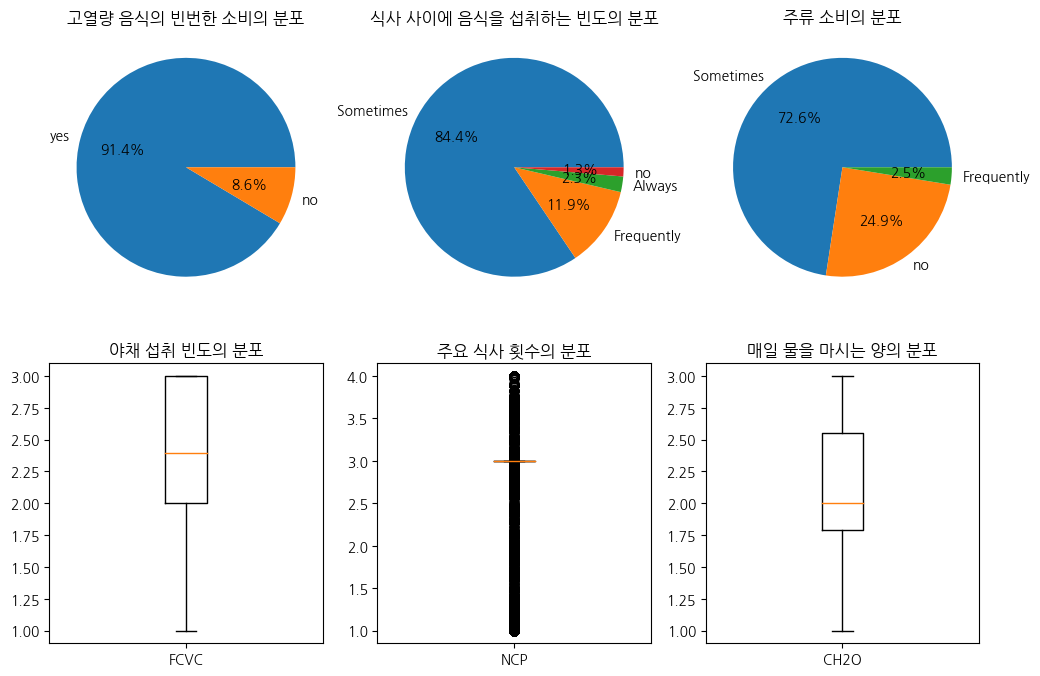

In [179]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i in range(3):
    axes[0][i].pie(
        obesity_df[list(categorical_columns.keys())[i]].value_counts(),
        labels=obesity_df[list(categorical_columns.keys())[i]].value_counts().index,
        autopct='%.1f%%'
    )
    axes[0][i].set_title(f'{list(categorical_columns.values())[i]}의 분포')

for i in range(3):
    axes[1][i].boxplot(
        obesity_df[list(numeric_columns.keys())[i]],
        labels=[list(numeric_columns.keys())[i]]
    )
    axes[1][i].set_title(f'{list(numeric_columns.values())[i]}의 분포')
    
plt.show()

Categorical 컬럼들은 Label Encoding 진행해 주는 편이 낫겠다.

In [178]:
obesity_df['FAVC_Numeric'] = obesity_df['FAVC'].map({
    'no': 0, 'yes': 1
})

obesity_df['CAEC_Numeric'] = obesity_df['CAEC'].map({
    'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3
})

obesity_df['CALC_Numeric'] = obesity_df['CALC'].map({
    'no': 0, 'Sometimes': 1, 'Frequently': 2
})

#### 2-2-6. 컬럼별 EDA (신체 상태 관련)

- SMOKE: 흡연 여부
- SCC: 칼로리 섭취량 모니터링
- FAF: 신체 활동 빈도
- TUE: 기술 기기 사용 시간
- MTRANS: 사용하는 교통 수단

In [180]:
categorical_columns = {
    'SMOKE': '흡연 여부',
    'SCC': '칼로리 섭취량 모니터링',
    'MTRANS': '사용하는 교통 수단'
}

numeric_columns = {
    'FAF': '신체 활동 빈도',
    'TUE': '기술 기기 사용 시간'
}

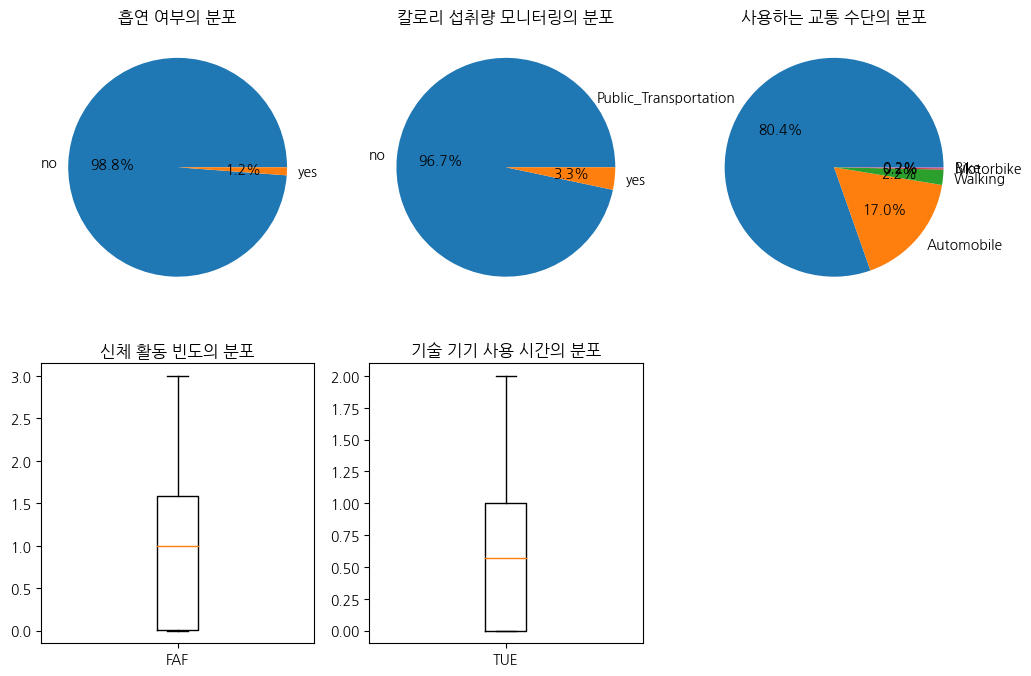

In [183]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i in range(3):
    axes[0][i].pie(
        obesity_df[list(categorical_columns.keys())[i]].value_counts(),
        labels=obesity_df[list(categorical_columns.keys())[i]].value_counts().index,
        autopct='%.1f%%'
    )
    axes[0][i].set_title(f'{list(categorical_columns.values())[i]}의 분포')

for i in range(2):
    axes[1][i].boxplot(
        obesity_df[list(numeric_columns.keys())[i]],
        labels=[list(numeric_columns.keys())[i]]
    )
    axes[1][i].set_title(f'{list(numeric_columns.values())[i]}의 분포')

axes[1][2].set_xticks([])
axes[1][2].set_yticks([])
axes[1][2].spines['top'].set_visible(False)
axes[1][2].spines['right'].set_visible(False)
axes[1][2].spines['bottom'].set_visible(False)
axes[1][2].spines['left'].set_visible(False)

plt.show()

마찬가지로 Categorical 컬럼들은 Label Encoding 진행해 주되, MTRANS의 경우 조금 더 확인해 볼 필요가 있을 것 같다.

In [184]:
obesity_df['MTRANS'].value_counts().to_frame()

,MTRANS
Public_Transportation,16687
Automobile,3534
Walking,467
Motorbike,38
Bike,32


각 교통수단의 활동성을 고려하여 도보는 2, 자전거와 대중교통은 1, 오토바이와 자동차는 0으로 인코딩해주는 게 가장 좋을 것 같다.

In [185]:
obesity_df['Smoke_Numeric'] = obesity_df['SMOKE'].map({
    'no': 0, 'yes': 1
})

obesity_df['SCC_Numeric'] = obesity_df['SCC'].map({
    'no': 0, 'yes': 1
})

obesity_df['MTRANS_Numeric'] = obesity_df['MTRANS'].map({
    'Motorbike': 0, 'Automobile': 0, 'Bike': 1, 'Public_Transportation': 1, 'Walking': 2
})

모든 EDA 및 전처리를 완료했으므로 numeric한 컬럼들만 취하여 저장한다.

In [191]:
obesity_df.select_dtypes(exclude=['object'])

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,NObeyesdad_numeric,NObeyesdad_Numeric,Family_History_Numeric,FAVC_Numeric,CAEC_Numeric,CALC_Numeric,Smoke_Numeric,SCC_Numeric,MTRANS_Numeric
id,,,,,,,,,,,,,,,,,,,
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,0,1,3,3,1,1,1,1,0,0,1
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,0,1,1,1,1,2,0,0,0,0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,1,0,0,0,1,1,1,0,0,0,1
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1,0,6,6,1,1,1,1,0,0,1
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,0,1,3,3,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,0,1,5,5,1,1,1,1,0,0,1
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,0,1,0,0,0,1,2,1,0,0,1
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,0,1,5,5,1,1,1,0,0,0,1


In [190]:
with open('obesity_df.pkl', 'wb') as file:
    pickle.dump(obesity_df.select_dtypes(exclude=['object']), file)

---

## 3. 데이터 분석

### 3-1. 문제 정의

**비만 여부를 예측**하는 다중 분류 모델을 개발한다.

### 3-2. 데이터 분석

In [ ]:
# 가설 검정, 머신러닝, ...

### 3-3. 결과 해석

내용

---

## 4. 후기

내용